In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense ,Dropout, LSTM
from tensorflow.keras.models import Sequential
!pip install yfinance
import yfinance as yf

In [71]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time



#optional 
#yahoo_finance.pdr_override()

%matplotlib inline

In [57]:
# ___variables___
ticker = 'AAPL'

start_time = datetime.datetime(2017, 10, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [58]:
start = dt.datetime(2020,1,1) 
end = dt.datetime.now()
Crypto_currency = "BTC"
Real_currency = "USD"

BTC_USD = yf.Ticker(f"{Crypto_currency}-{Real_currency}")
ticker_df = BTC_USD.history(start=start, end=end) 
ticker_df = ticker_df.reset_index()
print(ticker_df.head(5))

        Date         Open         High          Low        Close       Volume  Dividends  Stock Splits
0 2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  18565664997          0             0
1 2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  20802083465          0             0
2 2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  28111481032          0             0
3 2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  18444271275          0             0
4 2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  19725074095          0             0


In [59]:
df = ticker_df

In [60]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [61]:
df['RSI'] = computeRSI(df['Close'], 14)

In [62]:
print(df.head())
print(df.tail())

        Date         Open         High          Low        Close       Volume  Dividends  Stock Splits  RSI
0 2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  18565664997          0             0  NaN
1 2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  20802083465          0             0  NaN
2 2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  28111481032          0             0  NaN
3 2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  18444271275          0             0  NaN
4 2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  19725074095          0             0  NaN
          Date          Open          High           Low         Close       Volume  Dividends  Stock Splits        RSI
778 2022-02-17  43937.070312  44132.972656  40249.371094  40538.011719  26246662813          0             0  45.290400
779 2022-02-18  40552.132812  40929.152344  39637.617188  40030.976562  23310007704          0             0  43

In [63]:
df["decision"] = df.RSI

In [64]:
df.decision.fillna(0, inplace = True)
df.RSI.fillna(0, inplace = True)

In [65]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI,decision
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,0,0,0.000000,0.000000
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0,0,0.000000,0.000000
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0,0,0.000000,0.000000
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0,0,0.000000,0.000000
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
778,2022-02-17,43937.070312,44132.972656,40249.371094,40538.011719,26246662813,0,0,45.290400,45.290400
779,2022-02-18,40552.132812,40929.152344,39637.617188,40030.976562,23310007704,0,0,43.609584,43.609584
780,2022-02-19,40026.023438,40418.878906,39713.058594,40122.156250,13736557863,0,0,44.011980,44.011980
781,2022-02-20,40118.101562,40119.890625,38112.812500,38431.378906,18340576452,0,0,38.522445,38.522445


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [69]:
df.decision[df.RSI >= 70] = "sell"
df.decision[df.RSI <= 30] = "invest"
df.decision[(df.RSI < 70)  & (df.RSI > 30)] = "hold"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [70]:

print(df.head())
print(df.tail())

        Date         Open         High          Low        Close       Volume  Dividends  Stock Splits  RSI decision
0 2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  18565664997          0             0  0.0   invest
1 2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  20802083465          0             0  0.0   invest
2 2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  28111481032          0             0  0.0   invest
3 2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  18444271275          0             0  0.0   invest
4 2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  19725074095          0             0  0.0   invest
          Date          Open          High           Low         Close       Volume  Dividends  Stock Splits        RSI decision
778 2022-02-17  43937.070312  44132.972656  40249.371094  40538.011719  26246662813          0             0  45.290400     hold
779 2022-02-18  40552.132812  40929.1523

In [73]:
df.count

<bound method DataFrame.count of           Date          Open          High           Low         Close       Volume  Dividends  Stock Splits        RSI decision
0   2020-01-01   7194.892090   7254.330566   7174.944336   7200.174316  18565664997          0             0   0.000000   invest
1   2020-01-02   7202.551270   7212.155273   6935.270020   6985.470215  20802083465          0             0   0.000000   invest
2   2020-01-03   6984.428711   7413.715332   6914.996094   7344.884277  28111481032          0             0   0.000000   invest
3   2020-01-04   7345.375488   7427.385742   7309.514160   7410.656738  18444271275          0             0   0.000000   invest
4   2020-01-05   7410.451660   7544.497070   7400.535645   7411.317383  19725074095          0             0   0.000000   invest
..         ...           ...           ...           ...           ...          ...        ...           ...        ...      ...
778 2022-02-17  43937.070312  44132.972656  40249.371094  40538.

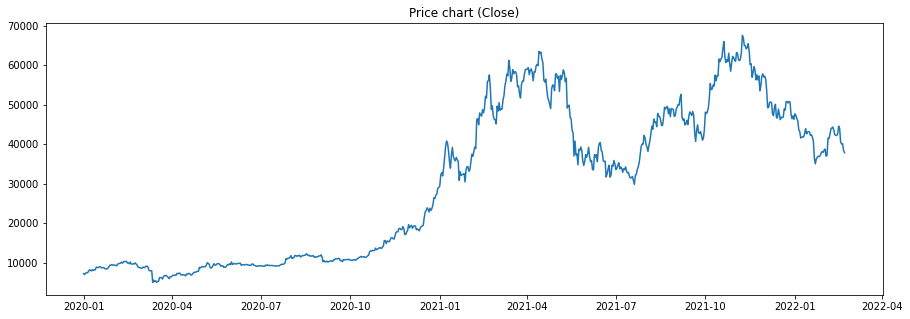

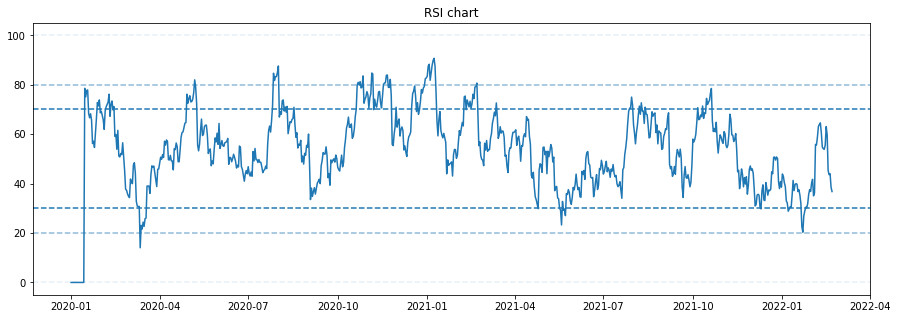

In [74]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Close'])
plt.title('Price chart (Close)')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['Date'], df['RSI'])

plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

In [78]:
dict = {}
dict["Date"] = "dd"

In [89]:
for i in np.arange(df.Date.size):
   dict[df.Date[i]] = df.decision[i]